In [689]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
 # Initial imports
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [640]:
# Loading data
df_cpi = pd.read_csv("CPI_table_1_edited.csv")
df_cpi.head()

,dates,Index Numbers ; All groups CPI ; Sydney ;,Index Numbers ; All groups CPI ; Melbourne ;,Index Numbers ; All groups CPI ; Brisbane ;,Index Numbers ; All groups CPI ; Adelaide ;,Index Numbers ; All groups CPI ; Perth ;,Index Numbers ; All groups CPI ; Hobart ;,Index Numbers ; All groups CPI ; Darwin ;,Index Numbers ; All groups CPI ; Canberra ;,Index Numbers ; All groups CPI ; Australia ;,...,Percentage Change from Corresponding Quarter of Previous Year ; All groups CPI ; Australia ;,Percentage Change from Previous Period ; All groups CPI ; Sydney ;,Percentage Change from Previous Period ; All groups CPI ; Melbourne ;,Percentage Change from Previous Period ; All groups CPI ; Brisbane ;,Percentage Change from Previous Period ; All groups CPI ; Adelaide ;,Percentage Change from Previous Period ; All groups CPI ; Perth ;,Percentage Change from Previous Period ; All groups CPI ; Hobart ;,Percentage Change from Previous Period ; All groups CPI ; Darwin ;,Percentage Change from Previous Period ; All groups CPI ; Canberra ;,Percentage Change from Previous Period ; All groups CPI ; Australia ;
0,1/09/1948,3.7,3.8,3.7,3.8,3.7,3.8,NaN,3.9,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/12/1948,3.7,3.8,3.7,3.9,3.8,3.9,NaN,4.1,3.8,...,NaN,0.0,0.0,0.0,2.6,2.7,2.6,NaN,5.1,2.7
2,1/03/1949,3.9,3.9,3.8,4.0,3.9,4.0,NaN,4.1,3.9,...,NaN,5.4,2.6,2.7,2.6,2.6,2.6,NaN,0.0,2.6
3,1/06/1949,3.9,4.0,3.9,4.0,4.0,4.1,NaN,4.2,4.0,...,NaN,0.0,2.6,2.6,0.0,2.6,2.5,NaN,2.4,2.6
4,1/09/1949,4.0,4.1,4.0,4.1,4.1,4.1,NaN,4.3,4.1,...,10.8,2.6,2.5,2.6,2.5,2.5,0.0,NaN,2.4,2.5


In [641]:
df_cpi.shape

(299, 28)

In [642]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   dates                                                                                           299 non-null    object 
 1   Index Numbers ;  All groups CPI ;  Sydney ;                                                     299 non-null    float64
 2   Index Numbers ;  All groups CPI ;  Melbourne ;                                                  299 non-null    float64
 3   Index Numbers ;  All groups CPI ;  Brisbane ;                                                   299 non-null    float64
 4   Index Numbers ;  All groups CPI ;  Adelaide ;                                                   299 non-null    float64
 5   Index Numbers ;

In [643]:
df_cpi.isnull().sum()

dates                                                                                               0
Index Numbers ;  All groups CPI ;  Sydney ;                                                         0
Index Numbers ;  All groups CPI ;  Melbourne ;                                                      0
Index Numbers ;  All groups CPI ;  Brisbane ;                                                       0
Index Numbers ;  All groups CPI ;  Adelaide ;                                                       0
Index Numbers ;  All groups CPI ;  Perth ;                                                          0
Index Numbers ;  All groups CPI ;  Hobart ;                                                         0
Index Numbers ;  All groups CPI ;  Darwin ;                                                       128
Index Numbers ;  All groups CPI ;  Canberra ;                                                       0
Index Numbers ;  All groups CPI ;  Australia ;                                    

In [644]:
# handling null valus in Percentage change
null_values_percentage = ["Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Sydney ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Melbourne ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Brisbane ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Adelaide ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Perth ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Hobart ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Darwin ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Canberra ;", "Percentage Change from Corresponding Quarter of Previous Year ;  All groups CPI ;  Australia ;"]

In [645]:
for col in null_values_percentage:
    df_cpi[col].fillna("", inplace=True)

In [646]:
# Handling null values in Percentage change Previous Period
null_values_percentage_pp = ["Percentage Change from Previous Period ;  All groups CPI ;  Sydney ;", "Percentage Change from Previous Period ;  All groups CPI ;  Melbourne ;", "Percentage Change from Previous Period ;  All groups CPI ;  Brisbane ;", "Percentage Change from Previous Period ;  All groups CPI ;  Adelaide ;", "Percentage Change from Previous Period ;  All groups CPI ;  Perth ;", "Percentage Change from Previous Period ;  All groups CPI ;  Hobart ;", "Percentage Change from Previous Period ;  All groups CPI ;  Darwin ;", "Percentage Change from Previous Period ;  All groups CPI ;  Canberra ;", "Percentage Change from Previous Period ;  All groups CPI ;  Australia ;"]

In [647]:
for col in null_values_percentage_pp:
    df_cpi[col].fillna("", inplace=True)

In [648]:
# Handling null values in all groups for Darwin
df_cpi["Index Numbers ;  All groups CPI ;  Darwin ;"].fillna("", inplace=True)

In [649]:
df_cpi.isnull().sum()

dates                                                                                             0
Index Numbers ;  All groups CPI ;  Sydney ;                                                       0
Index Numbers ;  All groups CPI ;  Melbourne ;                                                    0
Index Numbers ;  All groups CPI ;  Brisbane ;                                                     0
Index Numbers ;  All groups CPI ;  Adelaide ;                                                     0
Index Numbers ;  All groups CPI ;  Perth ;                                                        0
Index Numbers ;  All groups CPI ;  Hobart ;                                                       0
Index Numbers ;  All groups CPI ;  Darwin ;                                                       0
Index Numbers ;  All groups CPI ;  Canberra ;                                                     0
Index Numbers ;  All groups CPI ;  Australia ;                                                    0


In [650]:
df_cpi['Percentage Change from Previous Period ;  All groups CPI ;  Australia ;'] = pd.to_numeric(df_cpi['Percentage Change from Previous Period ;  All groups CPI ;  Australia ;'], errors='coerce')

In [651]:
df_cpi['percentage_increase'] = df_cpi['Percentage Change from Previous Period ;  All groups CPI ;  Australia ;'].apply(lambda x: 1 if x > 0 else 0)

In [652]:
df_cpi.head()

,dates,Index Numbers ; All groups CPI ; Sydney ;,Index Numbers ; All groups CPI ; Melbourne ;,Index Numbers ; All groups CPI ; Brisbane ;,Index Numbers ; All groups CPI ; Adelaide ;,Index Numbers ; All groups CPI ; Perth ;,Index Numbers ; All groups CPI ; Hobart ;,Index Numbers ; All groups CPI ; Darwin ;,Index Numbers ; All groups CPI ; Canberra ;,Index Numbers ; All groups CPI ; Australia ;,...,Percentage Change from Previous Period ; All groups CPI ; Sydney ;,Percentage Change from Previous Period ; All groups CPI ; Melbourne ;,Percentage Change from Previous Period ; All groups CPI ; Brisbane ;,Percentage Change from Previous Period ; All groups CPI ; Adelaide ;,Percentage Change from Previous Period ; All groups CPI ; Perth ;,Percentage Change from Previous Period ; All groups CPI ; Hobart ;,Percentage Change from Previous Period ; All groups CPI ; Darwin ;,Percentage Change from Previous Period ; All groups CPI ; Canberra ;,Percentage Change from Previous Period ; All groups CPI ; Australia ;,percentage_increase
0,1/09/1948,3.7,3.8,3.7,3.8,3.7,3.8,,3.9,3.7,...,,,,,,,,,NaN,0
1,1/12/1948,3.7,3.8,3.7,3.9,3.8,3.9,,4.1,3.8,...,0,0,0,2.6,2.7,2.6,,5.1,2.7,1
2,1/03/1949,3.9,3.9,3.8,4.0,3.9,4.0,,4.1,3.9,...,5.4,2.6,2.7,2.6,2.6,2.6,,0,2.6,1
3,1/06/1949,3.9,4.0,3.9,4.0,4.0,4.1,,4.2,4.0,...,0,2.6,2.6,0,2.6,2.5,,2.4,2.6,1
4,1/09/1949,4.0,4.1,4.0,4.1,4.1,4.1,,4.3,4.1,...,2.6,2.5,2.6,2.5,2.5,0,,2.4,2.5,1


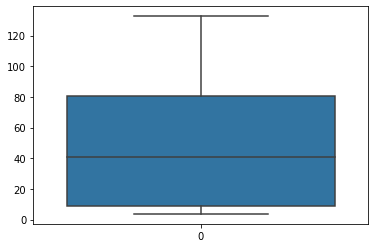

In [653]:
sns.boxplot(df_cpi["Index Numbers ;  All groups CPI ;  Australia ;"])

In [654]:
CPI_status = df_cpi["percentage_increase"].value_counts()



In [655]:
print("where a value of 1 indicates a positive increase in CPI from the previous period")
print("where a value of 1 indicates a decrease increase in CPI from the previous period")
CPI_status

where a value of 1 indicates a positive increase in CPI from the previous period
where a value of 1 indicates a decrease increase in CPI from the previous period


1    245
0     54
Name: percentage_increase, dtype: int64

Text(0.5, 1.0, 'CPI Increase')

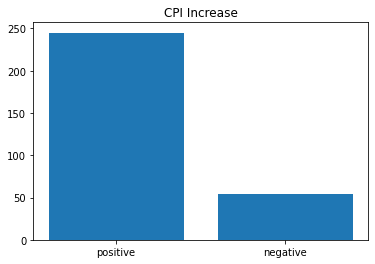

In [656]:
x = ["positive", "negative"]
plt.bar(x, CPI_status, align='center')
plt.title('CPI Increase')

In [657]:
#CPI_df_analysis = df_cpi['SydMelb'] = np.where(df_cpi['Index Numbers ;  All groups CPI ;  Sydney ;'] < df_cpi['Index Numbers ;  All groups CPI ;  Melbourne ;'], "Melbourne", "Sydney")

In [658]:
#CPI_df_analysis = df_cpi['BriPer'] = np.where(df_cpi['Index Numbers ;  All groups CPI ;  Perth ;'] < df_cpi['Index Numbers ;  All groups CPI ;  Brisbane ;'], "Brisbane", "Perth")

In [659]:
#CPI_df_analysis = df_cpi['PerMelb'] = np.where(df_cpi['Index Numbers ;  All groups CPI ;  Perth ;'] < df_cpi['Index Numbers ;  All groups CPI ;  Melbourne ;'], "Melbourne", "Perth")

In [660]:
df_cpi.head()

,dates,Index Numbers ; All groups CPI ; Sydney ;,Index Numbers ; All groups CPI ; Melbourne ;,Index Numbers ; All groups CPI ; Brisbane ;,Index Numbers ; All groups CPI ; Adelaide ;,Index Numbers ; All groups CPI ; Perth ;,Index Numbers ; All groups CPI ; Hobart ;,Index Numbers ; All groups CPI ; Darwin ;,Index Numbers ; All groups CPI ; Canberra ;,Index Numbers ; All groups CPI ; Australia ;,...,Percentage Change from Previous Period ; All groups CPI ; Sydney ;,Percentage Change from Previous Period ; All groups CPI ; Melbourne ;,Percentage Change from Previous Period ; All groups CPI ; Brisbane ;,Percentage Change from Previous Period ; All groups CPI ; Adelaide ;,Percentage Change from Previous Period ; All groups CPI ; Perth ;,Percentage Change from Previous Period ; All groups CPI ; Hobart ;,Percentage Change from Previous Period ; All groups CPI ; Darwin ;,Percentage Change from Previous Period ; All groups CPI ; Canberra ;,Percentage Change from Previous Period ; All groups CPI ; Australia ;,percentage_increase
0,1/09/1948,3.7,3.8,3.7,3.8,3.7,3.8,,3.9,3.7,...,,,,,,,,,NaN,0
1,1/12/1948,3.7,3.8,3.7,3.9,3.8,3.9,,4.1,3.8,...,0,0,0,2.6,2.7,2.6,,5.1,2.7,1
2,1/03/1949,3.9,3.9,3.8,4.0,3.9,4.0,,4.1,3.9,...,5.4,2.6,2.7,2.6,2.6,2.6,,0,2.6,1
3,1/06/1949,3.9,4.0,3.9,4.0,4.0,4.1,,4.2,4.0,...,0,2.6,2.6,0,2.6,2.5,,2.4,2.6,1
4,1/09/1949,4.0,4.1,4.0,4.1,4.1,4.1,,4.3,4.1,...,2.6,2.5,2.6,2.5,2.5,0,,2.4,2.5,1


In [661]:
df_cpi.isnull().sum()

dates                                                                                             0
Index Numbers ;  All groups CPI ;  Sydney ;                                                       0
Index Numbers ;  All groups CPI ;  Melbourne ;                                                    0
Index Numbers ;  All groups CPI ;  Brisbane ;                                                     0
Index Numbers ;  All groups CPI ;  Adelaide ;                                                     0
Index Numbers ;  All groups CPI ;  Perth ;                                                        0
Index Numbers ;  All groups CPI ;  Hobart ;                                                       0
Index Numbers ;  All groups CPI ;  Darwin ;                                                       0
Index Numbers ;  All groups CPI ;  Canberra ;                                                     0
Index Numbers ;  All groups CPI ;  Australia ;                                                    0


In [662]:
null_values_percentage_1 = ["Percentage Change from Previous Period ;  All groups CPI ;  Australia ;"]

In [663]:
for col in null_values_percentage_1:
    df_cpi[col].fillna("", inplace=True)

In [664]:
df_cpi['dates'] = pd.to_datetime(df_cpi['dates'], dayfirst=True, errors='coerce')

In [665]:
# Comparing Melb vs syd
#CPI_df_analysis = df_cpi["SydMelb"].value_counts()

In [666]:
#CPI_df_analysis = df_cpi["BriPer"].value_counts()

In [667]:
#CPI_df_analysis = df_cpi["PerMelb"].value_counts()

In [668]:
 # Define features set
#X = df_cpi.copy()
#X.drop("percentage_increase", axis=1, inplace=True)
#X.head()

In [669]:
# target vector is NewColumn
#y = df_cpi["percentage_increase"].values.reshape(-1, 1)
#y[:5]

In [670]:
# Splitting into Train and Test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [671]:
# Create the StandardScaler instance
#scaler = StandardScaler()

In [672]:
#non_numeric_cols = df_cpi.select_dtypes(exclude=[float, int]).columns

In [673]:
#for col in non_numeric_cols:
   # try:
     #   df_cpi[col] = pd.to_numeric(df_cpi[col])
    #except ValueError:
     #   print(f"Column '{col}' cannot be converted to numeric.")

In [674]:
#X_train = df_cpi.select_dtypes(include=[float, int])
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

In [675]:
# Fit the Standard Scaler with the training data
#_scaler = scaler.fit(X_train)

In [676]:
# Fit the Standard Scaler with the training data
#X_train_scaled = X_scaler.fit_transform(X_train)

In [677]:
 # Scale the training data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [678]:
 # Create the random forest classifier instance
#rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [679]:
 # Fit the model and use .ravel()on the "y_train" data. 
#rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [680]:
# Making predictions using the testing data
#predictions = rf_model.predict(X_test_scaled)

In [683]:
# Separate the features (X) from the target (y)
y = df_cpi["percentage_increase"]
X = df_cpi.drop(columns='percentage_increase')

In [684]:
# Reivew the y variable series
y.head()

0    0
1    1
2    1
3    1
4    1
Name: percentage_increase, dtype: int64

In [685]:
# Review the X variable dataframe
X.head()

,dates,Index Numbers ; All groups CPI ; Sydney ;,Index Numbers ; All groups CPI ; Melbourne ;,Index Numbers ; All groups CPI ; Brisbane ;,Index Numbers ; All groups CPI ; Adelaide ;,Index Numbers ; All groups CPI ; Perth ;,Index Numbers ; All groups CPI ; Hobart ;,Index Numbers ; All groups CPI ; Darwin ;,Index Numbers ; All groups CPI ; Canberra ;,Index Numbers ; All groups CPI ; Australia ;,...,Percentage Change from Corresponding Quarter of Previous Year ; All groups CPI ; Australia ;,Percentage Change from Previous Period ; All groups CPI ; Sydney ;,Percentage Change from Previous Period ; All groups CPI ; Melbourne ;,Percentage Change from Previous Period ; All groups CPI ; Brisbane ;,Percentage Change from Previous Period ; All groups CPI ; Adelaide ;,Percentage Change from Previous Period ; All groups CPI ; Perth ;,Percentage Change from Previous Period ; All groups CPI ; Hobart ;,Percentage Change from Previous Period ; All groups CPI ; Darwin ;,Percentage Change from Previous Period ; All groups CPI ; Canberra ;,Percentage Change from Previous Period ; All groups CPI ; Australia ;
0,1948-09-01,3.7,3.8,3.7,3.8,3.7,3.8,,3.9,3.7,...,,,,,,,,,,
1,1948-12-01,3.7,3.8,3.7,3.9,3.8,3.9,,4.1,3.8,...,,0,0,0,2.6,2.7,2.6,,5.1,2.7
2,1949-03-01,3.9,3.9,3.8,4.0,3.9,4.0,,4.1,3.9,...,,5.4,2.6,2.7,2.6,2.6,2.6,,0,2.6
3,1949-06-01,3.9,4.0,3.9,4.0,4.0,4.1,,4.2,4.0,...,,0,2.6,2.6,0,2.6,2.5,,2.4,2.6
4,1949-09-01,4.0,4.1,4.0,4.1,4.1,4.1,,4.3,4.1,...,10.8,2.6,2.5,2.6,2.5,2.5,0,,2.4,2.5


In [686]:
# Check the balance of our target values
y.value_counts()

1    245
0     54
Name: percentage_increase, dtype: int64

In [687]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(224, 28)

In [688]:
y_test.value_counts()

1    61
0    14
Name: percentage_increase, dtype: int64

In [691]:
# Create a logistic regression model
classifier = LogisticRegression(solver='lbfgs', max_iter=600, random_state=1)

# Fit and train the model using the training data
classifier.fit(X_train, y_train)

TypeError: invalid type promotion